# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)

## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [17]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [18]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((3,3))
b = np.random.sample((3,3))
print(a)
print(b)

[[ 0.19753891  0.68179992  0.84361395]
 [ 0.2057153   0.64387352  0.88246259]
 [ 0.16947542  0.6755349   0.01283305]]
[[ 0.62350409  0.50473561  0.76597707]
 [ 0.63362481  0.14592999  0.77475762]
 [ 0.50637633  0.41286825  0.89997951]]


In [19]:
def mult(a, b):
    d = []
    for x in range(len(a[0])):
        d.append([])
        for y in range(len(b[0])):
            d[x].append(0)
            for i in range(len(a)):
                d[x][y] += a[x][i]*b[i][y]
    return d

In [20]:
def np_mult(a, b):
    return a@b

In [21]:
%%time
mult(a,b)

Wall time: 998 µs


[[0.98235779831990278, 0.54750139096489681, 1.4387752278518409],
 [0.9830967308553743, 0.56213307604129525, 1.4506173629872963],
 [0.54020264064441692, 0.18941943737906636, 0.66473958127055255]]

In [22]:
%%time
np_mult(a,b)

Wall time: 501 µs


array([[ 0.9823578 ,  0.54750139,  1.43877523],
       [ 0.98309673,  0.56213308,  1.45061736],
       [ 0.54020264,  0.18941944,  0.66473958]])

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [76]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return np.sum(A)/A.size

In [81]:
# функция без NumPy
def stupid_sec_av(A):
    S = 0.;
    S = sum(A)
    S = S/len(A)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
print(np.abs(S1 - S2).sum(), '\n')
print("numpy считает с наименьшими потерями, чем просто python,\
поэтому почти не возможзможно добится одинаковой суммы массива от функций sum и np.sum")

Wall time: 21 ms
Wall time: 2.83 s
2.27040608536e-14 

numpy считает с наименьшими потерями, чем просто python,поэтому почти не возможзможно добится одинаковой суммы массива от функций sum и np.sum


### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [14]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    X_ = X.copy()
    X_[0::2] = a
    X_[1::2] = X_[1::2]**3
    X_ = X_[::-1]
    Y = np.hstack((X,X_))
    Y = Y[::-1]
    return Y

In [15]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    l = len(X)
    X_ = [X[i] for i in range(l)]
    for i in range(0,l,2):
        X_[i] = a
    for i in range(1,l,2):
        X_[i] = X_[i]**3
    X_ = X_[::-1]
    Y = [X[i] for i in range(l)]
    Y += X_
    Y = Y[::-1]
    return Y

In [16]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 1.32 s
Wall time: 23.4 s


0.0

Почему методы ***numpy*** оказываются эффективнее?

Потому что c Numpy работа происходит с массивами, а не списками, что в разы увеличивает производительность. 
Потому что в списках для получения n-го элемента, потребуется последовательно перебрать n-1 указателям.

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [113]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

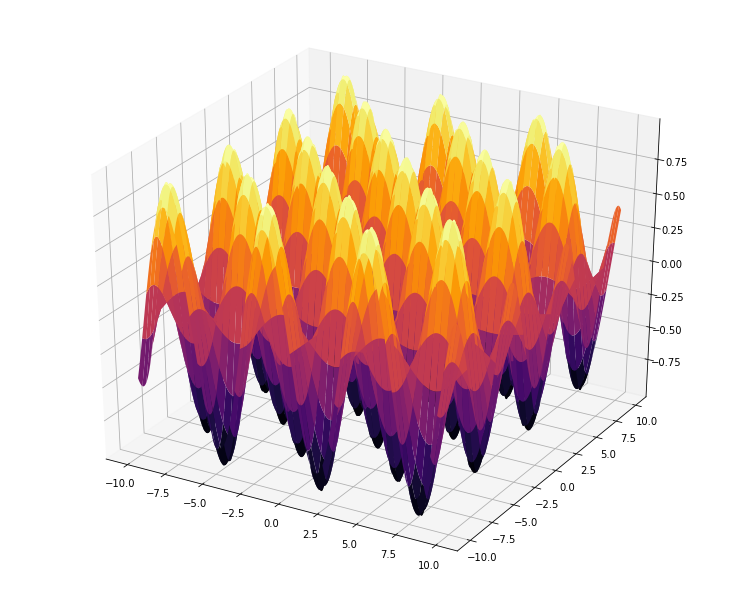

In [114]:
grid_x, grid_y = np.meshgrid(np.arange(-10,10,0.1),np.arange(-10,10,0.1))

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [115]:
from matplotlib import pyplot as plt
%matplotlib inline

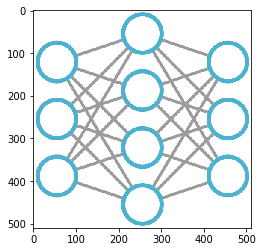

In [131]:
path_to_image = 'C:/Users/snexok/Documents/image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [142]:
flat_image_array = image_array.reshape(image_array.size)

In [143]:
flat_image_array.size

1040400